In [1]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [2]:
inputs = [

    # 1,9,17  Wt:W    
    # 2,10,18 Lux:W   
    # 3,11,19 Las:W   
    # 4,12,20 Tra:W   
    # 5,13,21 LuxR:LasI
    # 6,14,22 LuxR:LuxI
    # 7,15,23 LasR:LasI
    # 8,16,24 TraR:TraI
    # 25, 29, 33 WT:682
    # 26, 30, 34 Lux:682
    # 27, 31, 35 Las:682
    # 28, 32, 36 Tra:682


    
    
    


    ["Coculture 24h_Tube_001_001.fcs",'WT','none','0','1'],
    

    ["Coculture 24h_Tube"+"_002"+"_002"+".fcs",'LasR','W','24','1'],
    ["Coculture 24h_Tube"+"_003"+"_003"+".fcs",'LasR','W','24','2'],
    ["Coculture 24h_Tube"+"_004"+"_004"+".fcs",'LasR','W','24','3'],
    ["Coculture 24h_Tube"+"_005"+"_005"+".fcs",'LasR','W','24','4'],
    ["Coculture 24h_Tube"+"_006"+"_006"+".fcs",'LasR','W','24','5'],
    ["Coculture 24h_Tube"+"_007"+"_007"+".fcs",'LasR','W','24','6'],
    
    ["Coculture 24h_Tube"+"_008"+"_008"+".fcs",'LasR','LasI','24','1'],
    ["Coculture 24h_Tube"+"_009"+"_009"+".fcs",'LasR','LasI','24','2'],
    ["Coculture 24h_Tube"+"_010"+"_010"+".fcs",'LasR','LasI','24','3'],
    ["Coculture 24h_Tube"+"_011"+"_011"+".fcs",'LasR','LasI','24','4'],
    ["Coculture 24h_Tube"+"_012"+"_012"+".fcs",'LasR','LasI','24','5'],
    ["Coculture 24h_Tube"+"_013"+"_013"+".fcs",'LasR','LasI','24','6'],
    
    ["Coculture 48h_Tube"+"_002"+"_001"+".fcs",'LasR','W','48','1'],
    ["Coculture 48h_Tube"+"_003"+"_002"+".fcs",'LasR','W','48','2'],
    ["Coculture 48h_Tube"+"_004"+"_003"+".fcs",'LasR','W','48','3'],
    ["Coculture 48h_Tube"+"_005"+"_004"+".fcs",'LasR','W','48','4'],
    ["Coculture 48h_Tube"+"_006"+"_005"+".fcs",'LasR','W','48','5'],
    ["Coculture 48h_Tube"+"_007"+"_006"+".fcs",'LasR','W','48','6'],
    
    ["Coculture 48h_Tube"+"_008"+"_007"+".fcs",'LasR','LasI','48','1'],
    ["Coculture 48h_Tube"+"_009"+"_008"+".fcs",'LasR','LasI','48','2'],
    ["Coculture 48h_Tube"+"_010"+"_009"+".fcs",'LasR','LasI','48','3'],
    ["Coculture 48h_Tube"+"_011"+"_010"+".fcs",'LasR','LasI','48','4'],
    ["Coculture 48h_Tube"+"_012"+"_011"+".fcs",'LasR','LasI','48','5'],
    ["Coculture 48h_Tube"+"_013"+"_012"+".fcs",'LasR','LasI','48','6'], 
    


]

       
tubes = []
for filename, Rprotein, Iprotein, hours,REP in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'Rprotein' : Rprotein, 'Iprotein' : Iprotein, 'Hours' : hours, 'REP' : REP }))
    
ex = flow.ImportOp(conditions = {'Rprotein' : 'str', 'Iprotein' : 'str', 'Hours' : 'float','REP' : 'float'},
                   tubes = tubes).apply()


In [3]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10


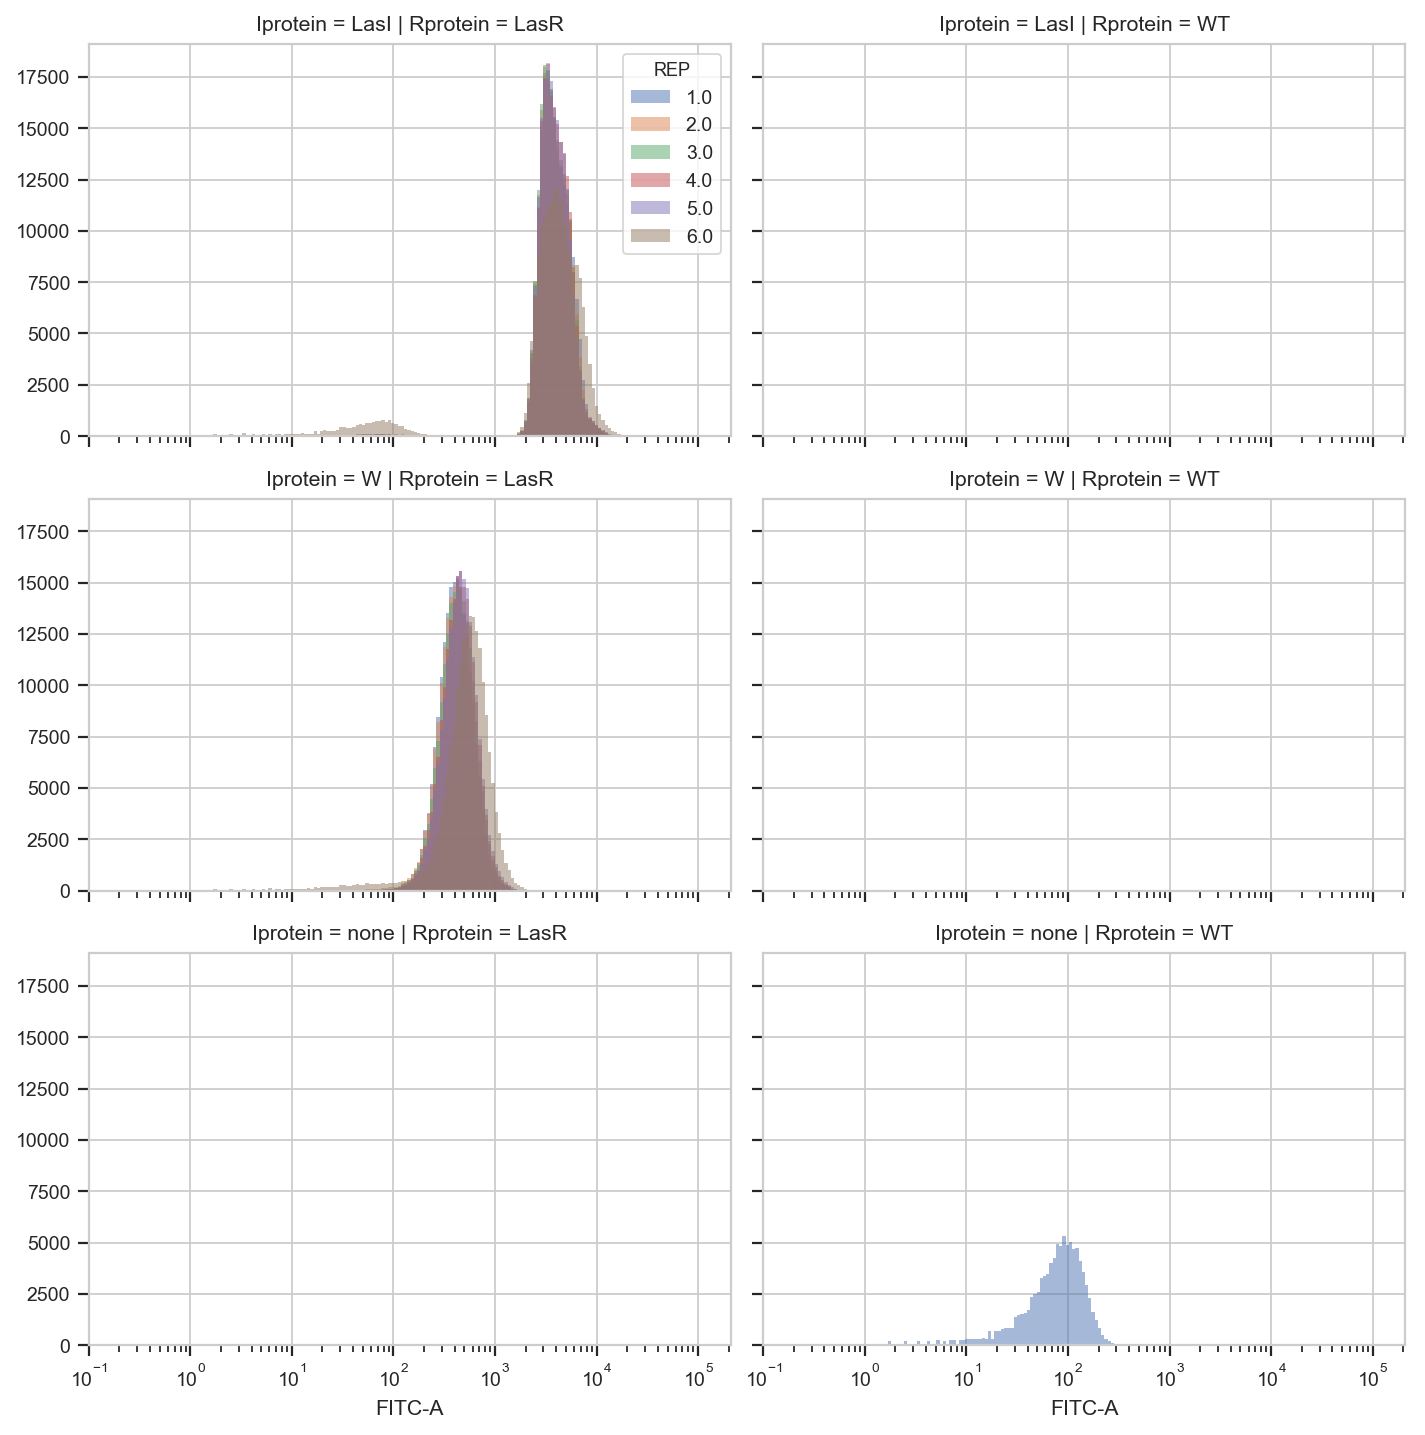

In [4]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = 'Rprotein',
                  yfacet = 'Iprotein',
                  huefacet = 'REP').plot(ex)


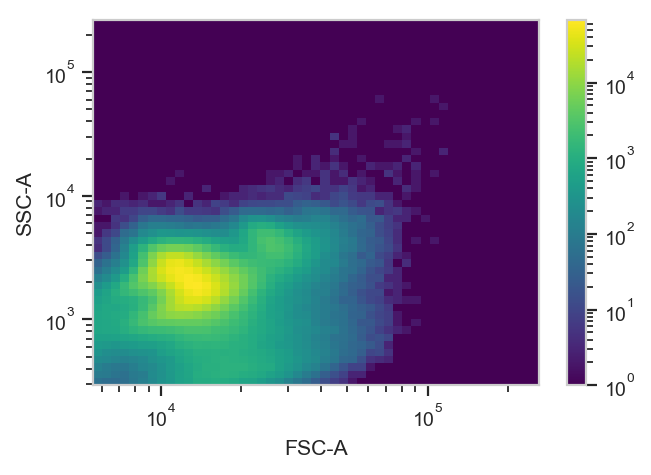

In [5]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

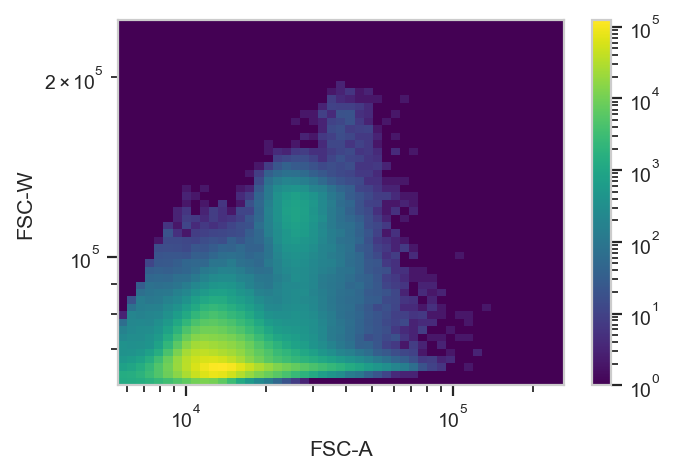

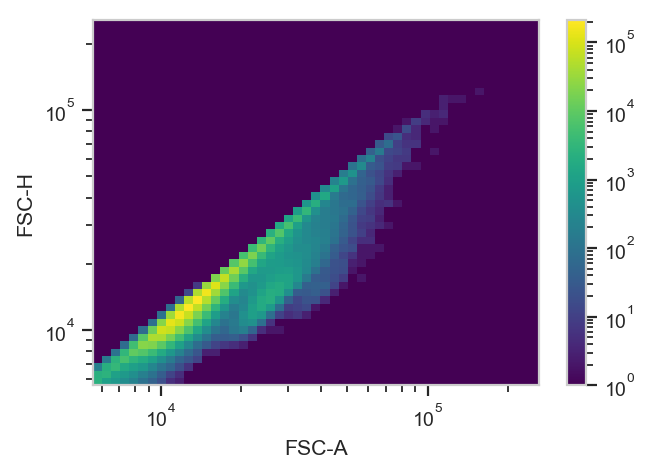

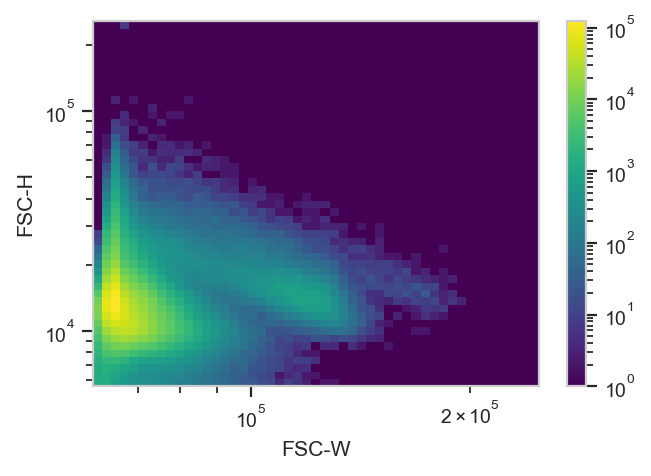

In [6]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


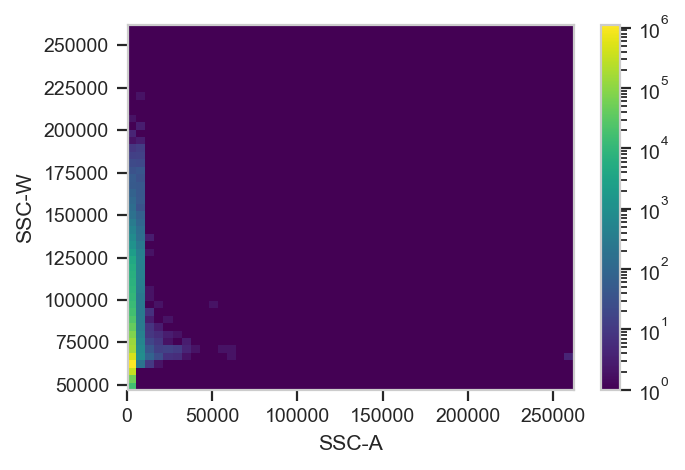

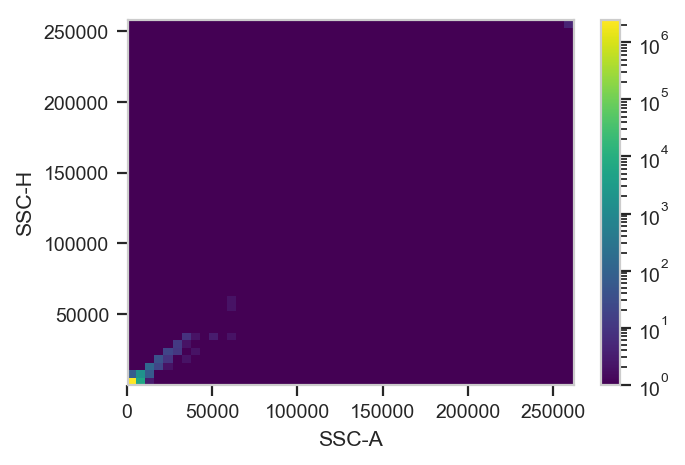

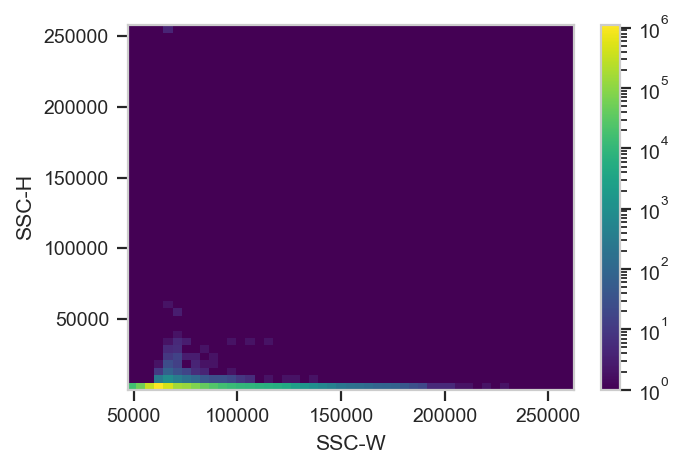

In [7]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

In [8]:
Chlorophyl = flow.Range2DOp(name = "Chlorophyl",
                   xchannel = "PerCP-Cy5-5-A",
                   xlow = 2000,
                   xhigh = 90000,
                   ychannel = "SSC-A",
                   ylow = 100,
                   yhigh = 15000)
                   
Chlorophylv = Chlorophyl.default_view(xscale ='log',yscale='log')

ex = Chlorophyl.apply(ex)
ex.data.groupby('Chlorophyl').size()

Chlorophyl
False      47076
True     2452924
dtype: int64

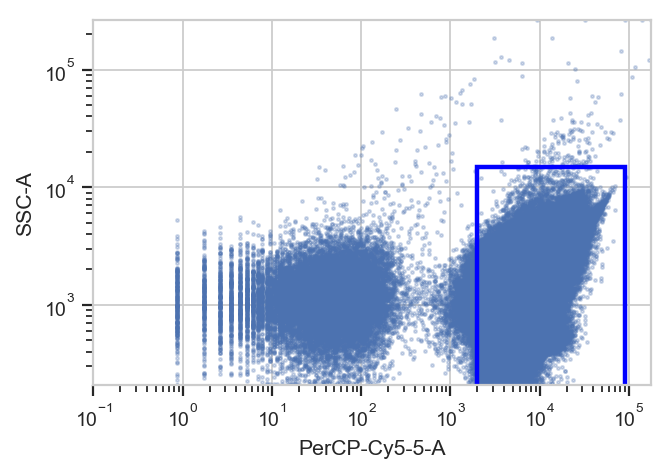

In [9]:
Chlorophylv.plot(ex)

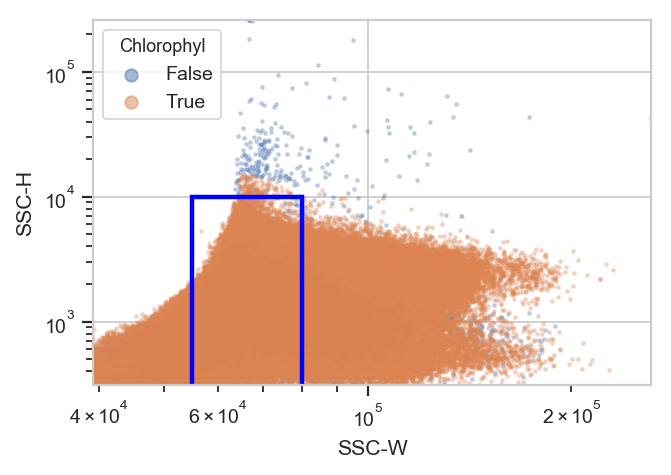

In [10]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log',huefacet = 'Chlorophyl')

rv.plot(ex)
ex = r.apply(ex)

In [11]:
ex.data.groupby('Range2D').size()

Range2D
False     248612
True     2251388
dtype: int64

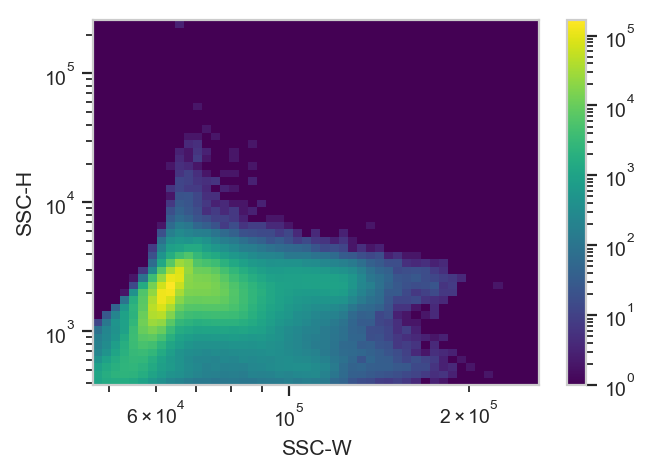

In [12]:
flow.DensityView(xchannel = "SSC-W", 
                 ychannel = "SSC-H",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

## Use a gaussian mixture model to further gate the population

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


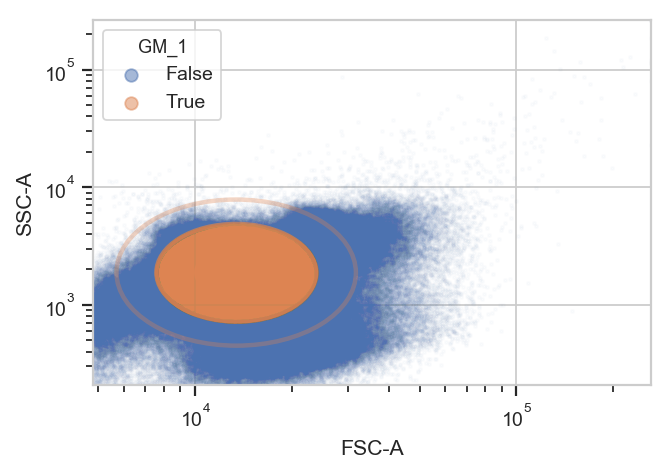

In [13]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex)
ex = gm.apply(ex)
gm.default_view().plot(ex, alpha = 0.02)

In [15]:
df =ex.data

In [16]:
ex.data.head()

,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,Hours,...,REP,Rprotein,SSC-A,SSC-H,SSC-W,Time,Chlorophyl,Range2D,GM_1,GM3_1
0,-7.910000,84.0,0.000000,80.040001,72.0,72854.187500,11583.640625,11436.0,66382.085938,0.0,...,1.0,WT,1584.270020,1612.0,64408.636719,53.000000,True,True,True,True
1,61.020000,69.0,57956.621094,75.690002,85.0,58357.882812,13651.000000,13457.0,66480.789062,0.0,...,1.0,WT,2101.050049,2117.0,65042.234375,53.000000,True,True,True,True
2,68.930000,80.0,56467.457031,100.919998,154.0,42947.359375,14183.169922,14590.0,63708.585938,0.0,...,1.0,WT,2317.679932,2346.0,64744.875000,53.000000,True,True,True,False
3,19.209999,60.0,20982.441406,107.879997,52.0,135962.000000,13716.700195,13456.0,66805.718750,0.0,...,1.0,WT,1857.449951,1876.0,64887.972656,53.200001,True,True,True,False
4,38.419998,44.0,57224.839844,140.070007,158.0,58098.910156,16286.300781,15658.0,68165.726562,0.0,...,1.0,WT,1123.170044,1166.0,63128.707031,53.200001,True,True,True,False


take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [17]:

df = df[(df.GM_1==True) & (df.Range2D==True) & (df.Chlorophyl==True) & (df['FITC-A'] >0)] 
#df
# 

In [18]:
#f, ax = plt.subplots()
#sns.kdeplot(x='SSC-W',y='SSC-H',data=df[['SSC-W', 'SSC-H']],ax=ax)

In [25]:
df.groupby(['Hours','Rprotein','Iprotein']).mean()['FITC-A']


Hours  Rprotein  Iprotein
0.0    WT        none          84.101788
24.0   LasR      LasI        3704.995334
                 W            457.362010
48.0   LasR      LasI        4693.425299
                 W            497.881131
Name: FITC-A, dtype: float64

In [26]:
data = df[['FITC-A','Rprotein','Iprotein','Hours','REP']]

In [28]:
data.loc[:,'FITC-A'] - data.loc[data.Rprotein=='WT','FITC-A'].median()

0            -0.870003
1            -5.220001
5            41.759995
7            17.399994
8           -59.160004
9            -9.570000
10          -36.540005
11           15.659996
13           -4.350006
15          -32.190002
16          -13.920006
17           78.300003
18          -33.930004
21           45.239998
25          -15.660004
27          -60.030003
28          -55.680004
31            4.349998
35           13.919998
36          -13.050003
37          -44.370003
39           -9.570000
41           -5.220001
43           79.169998
45           64.379990
47           44.369995
49          -55.680004
54          -21.750004
55           46.110001
60           29.579994
              ...     
2499918    4091.610016
2499921    8490.330231
2499925    6144.810211
2499930    6169.170074
2499931    6414.509918
2499935    4819.799957
2499936     -77.430004
2499937    1994.039948
2499940    4715.400055
2499943      53.940002
2499944     -14.790001
2499945    2729.190094
2499952    

In [32]:
# Subtract WT background from samples
data = df[['FITC-A','Rprotein','Iprotein','Hours','REP']]
data.loc[:,'FITC-A'] = data.loc[:,'FITC-A'] - data.loc[data.Rprotein=='WT','FITC-A'].median()
#data.loc[:,'FITC-A'] = data.loc[data['FITC-A'] > 0,'FITC-A']
data.loc[data['FITC-A'] < 0,'FITC-A']=0
data.loc[:,'Replicate'] = 1
data.to_pickle(r'../../../../compiled-data/Figure 5/Las.pkl')

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
data['FITC-A'].min()

0.8699951171875

In [31]:
data.groupby(['Hours','Rprotein','Iprotein']).mean()['FITC-A']

Hours  Rprotein  Iprotein
0.0    WT        none          19.613184
24.0   LasR      LasI        3624.091173
                 W            376.461575
48.0   LasR      LasI        4613.056301
                 W            417.521081
Name: FITC-A, dtype: float64

# Plot median FITC-A

use median or geometeric mean 

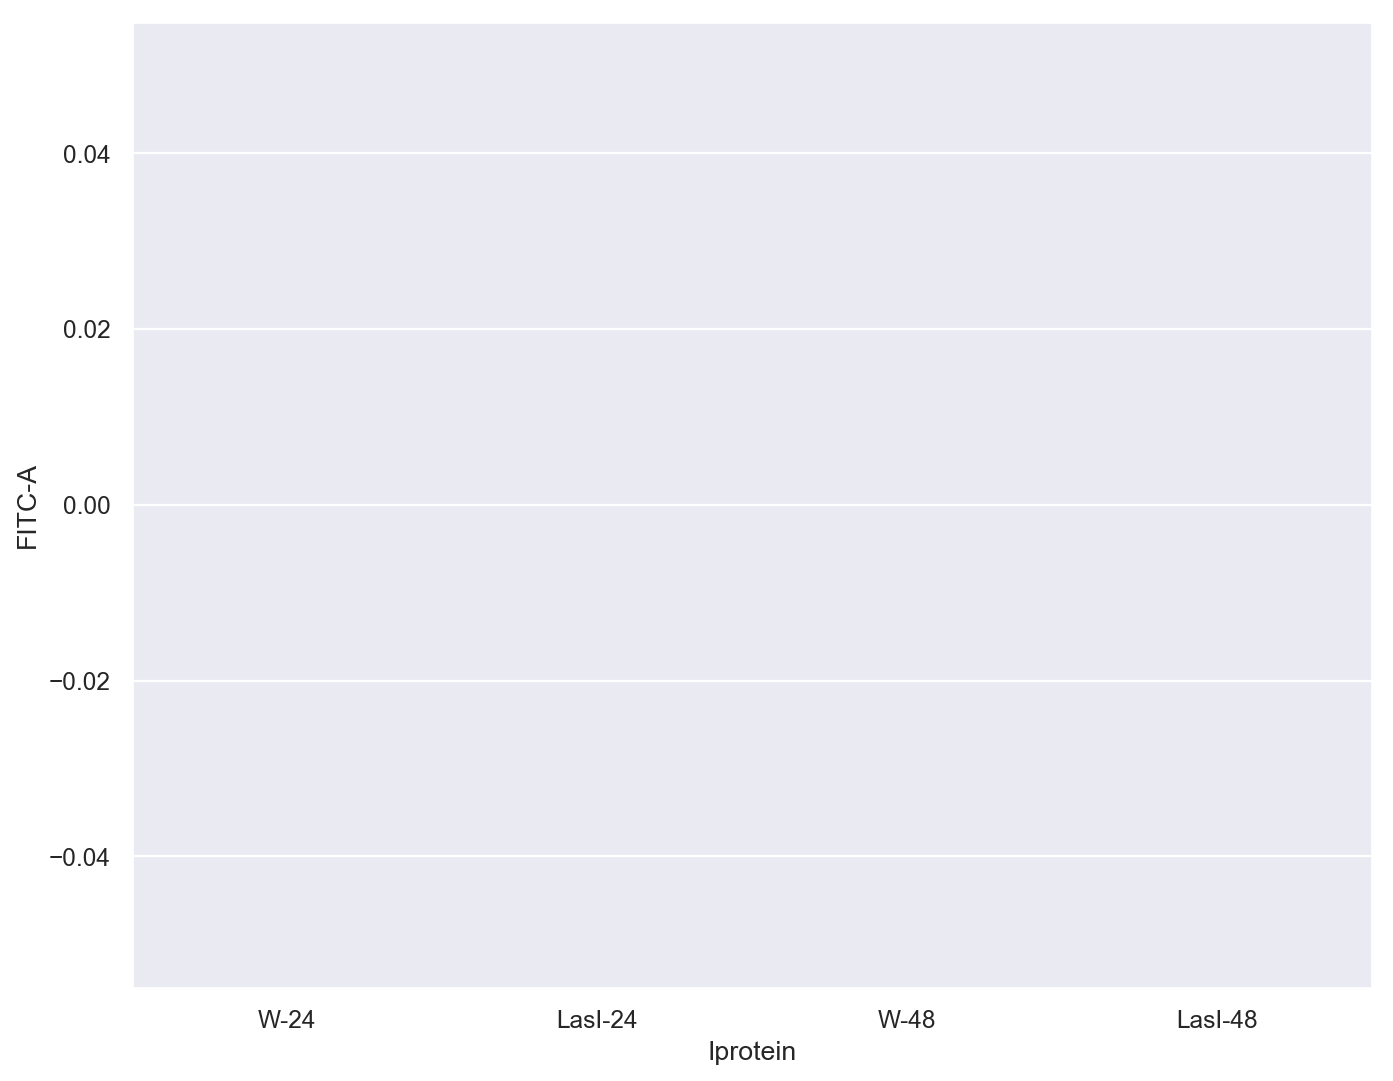

In [23]:
mfi = data.groupby(['Rprotein','Iprotein'])['FITC-A'].median().reset_index()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(10,8))

#sns.pointplot(x='Rprotein',y='FITC-A',hue='Iprotein',data=mfi)
sns.barplot(x='Iprotein',y='FITC-A',data=mfi,order=['W-24','LasI-24','W-48','LasI-48'],ci=85)

#f.savefig('TraR*.png',dpi=600)
f.savefig('LasR_LasI_coculture.png',dpi=600, transparent=True)

STOP HERE